In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold, cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier

from sklearn.naive_bayes import GaussianNB, MultinomialNB, CategoricalNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier

import xgboost as xgb
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
seed = 44


In [3]:
bodmas_df = '../datasets/bodmas.npz'

In [4]:
data = np.load(bodmas_df)
X = data['X']  # all the feature vectors
y = data['y']  # labels, 0 as benign, 1 as malicious

print(X.shape, y.shape)
frame = pd.DataFrame(data['X'])
frame

(134435, 2381) (134435,)


,0,1,2,3,4,5,6,7,8,9,...,2371,2372,2373,2374,2375,2376,2377,2378,2379,2380
0,0.056742,0.008017,0.007762,0.005466,0.007762,0.004446,0.005430,0.003061,0.009475,0.006305,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.007062,0.004500,0.004498,0.004318,0.004410,0.004330,0.004265,0.004068,0.004391,0.004306,...,0.0,0.0,0.0,0.0,120.0,16564.0,0.0,0.0,0.0,0.0
2,0.020975,0.004699,0.004002,0.004419,0.004214,0.003865,0.003973,0.004297,0.003921,0.004145,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.006482,0.003821,0.003788,0.003866,0.003734,0.003784,0.003884,0.003937,0.003805,0.003809,...,0.0,0.0,0.0,0.0,140.0,16384.0,0.0,0.0,0.0,0.0
4,0.022135,0.003972,0.003834,0.003869,0.003759,0.003765,0.003777,0.003863,0.003773,0.003798,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134430,0.065420,0.005993,0.005216,0.005492,0.005747,0.004183,0.005373,0.004388,0.005619,0.004121,...,72.0,1160180.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
134431,0.065421,0.005993,0.005216,0.005492,0.005747,0.004183,0.005373,0.004388,0.005617,0.004121,...,72.0,1160180.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
134432,0.142307,0.016379,0.010974,0.005991,0.009369,0.005670,0.003335,0.003099,0.009761,0.002385,...,64.0,674640.0,0.0,0.0,2180.0,585728.0,0.0,0.0,0.0,0.0
134433,0.142308,0.016379,0.010974,0.005991,0.009369,0.005670,0.003335,0.003099,0.009761,0.002386,...,64.0,674640.0,0.0,0.0,2180.0,585728.0,0.0,0.0,0.0,0.0


In [5]:
metadata = pd.read_csv('../datasets/bodmas_metadata.csv', parse_dates=['timestamp'])
metadata_new = pd.read_csv('../datasets/bodmas_metadata_new.csv', parse_dates=['timestamp'])
metadata_new.head()

,sha,timestamp,family,timestamp_new
0,e6d7b4bab32def853ab564410df53fa33172dda1bfd48c...,2007-01-01 08:46:39+00:00,NaN,2007-01-01 08:46:39+00:00
1,5af37a058a5bcf2284c183ee98d92b7c66d8f5ce623e92...,2007-01-26 17:16:30+00:00,NaN,2007-01-26 17:16:30+00:00
2,5bfbbea150af5cef2d3a93b80ef7c7faea9f564b56045d...,2007-03-21 02:08:53+00:00,NaN,2007-03-21 02:08:53+00:00
3,216f592f1e1717d5681b7f5f2b14a28a2f0c603b5b7318...,2007-04-25 12:55:06+00:00,NaN,2007-04-25 12:55:06+00:00
4,a1ca76813d2e9e7e23b830c87fbe29bcb51fcbe096e445...,2007-11-14 15:03:55+00:00,NaN,2007-11-14 15:03:55+00:00


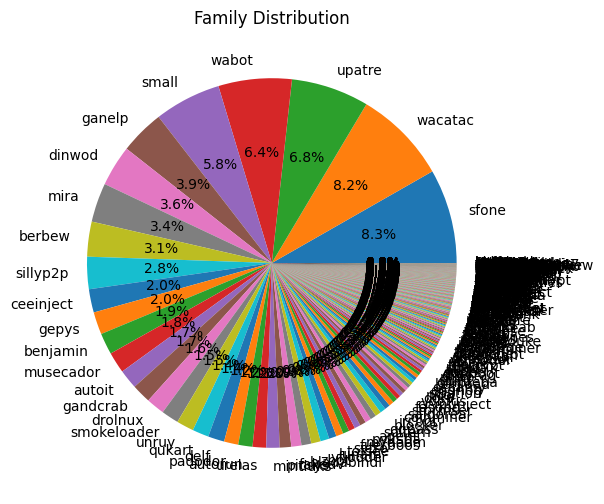

In [6]:
metadata_new.family.value_counts()
# metadata_new.family.value_counts().plot(kind='bar', figsize=(12, 6), title='Family Distribution')
plt.figure(figsize=(12, 6))
plt.pie(metadata_new.family.value_counts(), labels=metadata_new.family.value_counts().index, autopct='%1.1f%%')
plt.title('Family Distribution')
plt.show()

In [7]:
family_counts = metadata_new.family.value_counts().to_frame().head(20)
family_counts

,count
family,
sfone,4729
wacatac,4694
upatre,3901
wabot,3673
small,3339
ganelp,2232
dinwod,2057
mira,1960
berbew,1749


In [8]:
metadata_new.fillna('benign', inplace=True)
metadata_new.family[metadata_new.family == 'benign'].count()

np.int64(77142)

In [9]:
metadata_new.head()

,sha,timestamp,family,timestamp_new
0,e6d7b4bab32def853ab564410df53fa33172dda1bfd48c...,2007-01-01 08:46:39+00:00,benign,2007-01-01 08:46:39+00:00
1,5af37a058a5bcf2284c183ee98d92b7c66d8f5ce623e92...,2007-01-26 17:16:30+00:00,benign,2007-01-26 17:16:30+00:00
2,5bfbbea150af5cef2d3a93b80ef7c7faea9f564b56045d...,2007-03-21 02:08:53+00:00,benign,2007-03-21 02:08:53+00:00
3,216f592f1e1717d5681b7f5f2b14a28a2f0c603b5b7318...,2007-04-25 12:55:06+00:00,benign,2007-04-25 12:55:06+00:00
4,a1ca76813d2e9e7e23b830c87fbe29bcb51fcbe096e445...,2007-11-14 15:03:55+00:00,benign,2007-11-14 15:03:55+00:00


In [10]:
metadata_new['timestamp_new'] = pd.to_datetime(metadata_new['timestamp_new'], utc=True).astype(np.int64)
metadata_new.head()

,sha,timestamp,family,timestamp_new
0,e6d7b4bab32def853ab564410df53fa33172dda1bfd48c...,2007-01-01 08:46:39+00:00,benign,1167641199000000000
1,5af37a058a5bcf2284c183ee98d92b7c66d8f5ce623e92...,2007-01-26 17:16:30+00:00,benign,1169831790000000000
2,5bfbbea150af5cef2d3a93b80ef7c7faea9f564b56045d...,2007-03-21 02:08:53+00:00,benign,1174442933000000000
3,216f592f1e1717d5681b7f5f2b14a28a2f0c603b5b7318...,2007-04-25 12:55:06+00:00,benign,1177505706000000000
4,a1ca76813d2e9e7e23b830c87fbe29bcb51fcbe096e445...,2007-11-14 15:03:55+00:00,benign,1195052635000000000


In [11]:
bodmas_category = pd.read_csv('../datasets/bodmas_malware_category.csv')
bodmas_category.head()

,sha256,category
0,6a695877f571d043fe08d3cc715d9d4b4af85ffe837fa0...,worm
1,9ef9439795cac85e711b59df296a19e7ac43c144035f2f...,trojan
2,32de655f9010d8d152db16c6e5bbad215fa09286a08ff1...,worm
3,a68f7fb26ad84859625002395cf67f22ea0956996ed9c8...,downloader
4,d5c74472adfda20166a65f8b2886819a014ebcb67b999e...,trojan


In [12]:
bodmas_category.rename(columns={'sha256': 'sha'}, inplace=True)
bodmas_category.head()

,sha,category
0,6a695877f571d043fe08d3cc715d9d4b4af85ffe837fa0...,worm
1,9ef9439795cac85e711b59df296a19e7ac43c144035f2f...,trojan
2,32de655f9010d8d152db16c6e5bbad215fa09286a08ff1...,worm
3,a68f7fb26ad84859625002395cf67f22ea0956996ed9c8...,downloader
4,d5c74472adfda20166a65f8b2886819a014ebcb67b999e...,trojan


In [13]:
bodmas_data = pd.merge(metadata_new, bodmas_category, on='sha', how='left')
bodmas_data.drop(columns=['timestamp'], inplace=True)
bodmas_data.head()

,sha,family,timestamp_new,category
0,e6d7b4bab32def853ab564410df53fa33172dda1bfd48c...,benign,1167641199000000000,NaN
1,5af37a058a5bcf2284c183ee98d92b7c66d8f5ce623e92...,benign,1169831790000000000,NaN
2,5bfbbea150af5cef2d3a93b80ef7c7faea9f564b56045d...,benign,1174442933000000000,NaN
3,216f592f1e1717d5681b7f5f2b14a28a2f0c603b5b7318...,benign,1177505706000000000,NaN
4,a1ca76813d2e9e7e23b830c87fbe29bcb51fcbe096e445...,benign,1195052635000000000,NaN


In [14]:
bodmas_data.category.fillna('benign', inplace=True)
bodmas_data.head()

,sha,family,timestamp_new,category
0,e6d7b4bab32def853ab564410df53fa33172dda1bfd48c...,benign,1167641199000000000,benign
1,5af37a058a5bcf2284c183ee98d92b7c66d8f5ce623e92...,benign,1169831790000000000,benign
2,5bfbbea150af5cef2d3a93b80ef7c7faea9f564b56045d...,benign,1174442933000000000,benign
3,216f592f1e1717d5681b7f5f2b14a28a2f0c603b5b7318...,benign,1177505706000000000,benign
4,a1ca76813d2e9e7e23b830c87fbe29bcb51fcbe096e445...,benign,1195052635000000000,benign


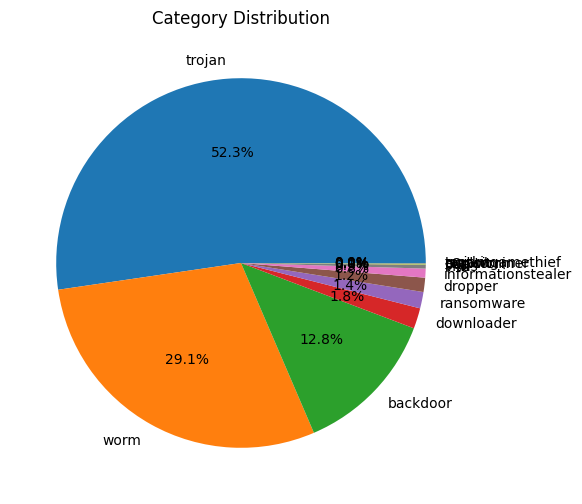

In [15]:
no_benign = bodmas_data[bodmas_data['category'] != 'benign']
plt.figure(figsize=(12, 6))
plt.pie(no_benign.category.value_counts(), labels=no_benign.category.value_counts().index, autopct='%1.1f%%')
plt.title('Category Distribution')
plt.show()

In [16]:
le = LabelEncoder()
bodmas_data['category'] = le.fit_transform(bodmas_data['category'])
bodmas_data['family'] = le.fit_transform(bodmas_data['family'])
bodmas_data.head()

,sha,family,timestamp_new,category
0,e6d7b4bab32def853ab564410df53fa33172dda1bfd48c...,54,1167641199000000000,1
1,5af37a058a5bcf2284c183ee98d92b7c66d8f5ce623e92...,54,1169831790000000000,1
2,5bfbbea150af5cef2d3a93b80ef7c7faea9f564b56045d...,54,1174442933000000000,1
3,216f592f1e1717d5681b7f5f2b14a28a2f0c603b5b7318...,54,1177505706000000000,1
4,a1ca76813d2e9e7e23b830c87fbe29bcb51fcbe096e445...,54,1195052635000000000,1


In [17]:
bodmas_data.drop('sha', axis=1, inplace=True)
bodmas_pd = pd.DataFrame(bodmas_data)
bodmas_pd

,family,timestamp_new,category
0,54,1167641199000000000,1
1,54,1169831790000000000,1
2,54,1174442933000000000,1
3,54,1177505706000000000,1
4,54,1195052635000000000,1
...,...,...,...
134430,33,1601435122000000000,11
134431,33,1601435123000000000,11
134432,33,1601435124000000000,11
134433,33,1601435126000000000,11


In [18]:
X_full = pd.DataFrame(data['X'])
y_full = pd.DataFrame(data['y'])
full_data = pd.concat([X_full, bodmas_data[['timestamp_new', 'family']], y_full], axis=1, ignore_index=True, sort=False)

In [19]:
y_category = bodmas_data.category.values

In [ ]:
#Initial: Binary Classification
X_train, X_test, y_train, y_test = train_test_split(X_full, y_full, test_size=0.2, stratify=y_full, random_state=seed)
#Extended: Multi-class Classification with family labels
X_train_with_fam, X_test_with_fam, y_train_with_fam, y_test_with_fam = train_test_split(full_data, y_category, test_size=0.2, stratify=y_category, random_state=seed)
#Extended: Multi-class Classification without family labels
X_train_no_fam, X_test_no_fam, y_train_no_fam, y_test_no_fam = train_test_split(X_full, y_category, test_size=0.2, stratify=y_category, random_state=seed)

In [21]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

scaler_with_fam = MinMaxScaler()
X_train_with_fam = scaler_with_fam.fit_transform(X_train_with_fam)
X_test_with_fam = scaler_with_fam.fit_transform(X_test_with_fam)

scaler_no_fam = MinMaxScaler()
X_train_no_fam = scaler_no_fam.fit_transform(X_train_no_fam)
X_test_no_fam = scaler_no_fam.fit_transform(X_test_no_fam)

In [22]:
def summary(y_test, pred):
    acc = accuracy_score(y_test, pred, normalize=True)
    prec = precision_score(y_test, pred, average='weighted')
    recall = recall_score(y_test, pred, average='weighted')
    
    print('Length of Testing Data: ', len(y_test))
    print('Accuracy: ', acc)
    print('Precision: ', prec)
    print('Recall Score: ', recall)
    

In [27]:
k = 5
skf = StratifiedKFold(n_splits=k, shuffle=True, random_state=seed)

In [23]:
for fold, (train_index, test_index) in enumerate(skf.split(X_train, y_train)):
    X_train_fold, X_test_fold = X_train[train_index], X_train[test_index]
    y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]
    
    print(f'Fold {fold + 1}/{k}')
    LogReg = LogisticRegression(random_state=seed)
    LogReg.fit(X_train_fold, y_train_fold)
    pred = LogReg.predict(X_test_fold)
    summary(y_test_fold, pred)

Fold 1/5
Length of Testing Data:  21510
Accuracy:  0.9703858670385868
Precision:  0.9704750870883632
Recall Score:  0.9703858670385868
Fold 2/5
Length of Testing Data:  21510
Accuracy:  0.9783356578335658
Precision:  0.9783849887262387
Recall Score:  0.9783356578335658
Fold 3/5
Length of Testing Data:  21510
Accuracy:  0.9774058577405857
Precision:  0.977412008756444
Recall Score:  0.9774058577405857
Fold 4/5
Length of Testing Data:  21509
Accuracy:  0.981217164907713
Precision:  0.9812598855424216
Recall Score:  0.981217164907713
Fold 5/5
Length of Testing Data:  21509
Accuracy:  0.9788460644381421
Precision:  0.9788604553324279
Recall Score:  0.9788460644381421


In [24]:
for fold, (train_index, test_index) in enumerate(skf.split(X_train_with_fam, y_train_with_fam)):
    X_train_fold, X_test_fold = X_train_with_fam[train_index], X_train_with_fam[test_index]
    y_train_fold, y_test_fold = y_train_with_fam[train_index], y_train_with_fam[test_index]
    
    print(f'Fold {fold + 1}/{k}')
    LogReg_with_fam = LogisticRegression(random_state=seed)
    LogReg_with_fam.fit(X_train_fold, y_train_fold)
    pred_exp = LogReg_with_fam.predict(X_test_fold)
    summary(y_test_fold, pred_exp)

Fold 1/5
Length of Testing Data:  21510
Accuracy:  0.9376104137610414
Precision:  0.9249779100401104
Recall Score:  0.9376104137610414
Fold 2/5
Length of Testing Data:  21510
Accuracy:  0.9407717340771734
Precision:  0.931518025450208
Recall Score:  0.9407717340771734
Fold 3/5
Length of Testing Data:  21510
Accuracy:  0.9380288238028823
Precision:  0.9278391073812643
Recall Score:  0.9380288238028823
Fold 4/5
Length of Testing Data:  21509
Accuracy:  0.940629503928588
Precision:  0.9320417689080652
Recall Score:  0.940629503928588
Fold 5/5
Length of Testing Data:  21509
Accuracy:  0.94611557952485
Precision:  0.9360709568904041
Recall Score:  0.94611557952485


In [25]:
for fold, (train_index, test_index) in enumerate(skf.split(X_train_no_fam, y_train_no_fam)):
    X_train_fold, X_test_fold = X_train_no_fam[train_index], X_train_no_fam[test_index]
    y_train_fold, y_test_fold = y_train_no_fam[train_index], y_train_no_fam[test_index]
    
    print(f'Fold {fold + 1}/{k}')
    LogReg_no_fam = LogisticRegression(random_state=seed)
    LogReg_no_fam.fit(X_train_fold, y_train_fold)
    pred = LogReg_no_fam.predict(X_test_fold)
    summary(y_test_fold, pred)

Fold 1/5
Length of Testing Data:  21510
Accuracy:  0.8987447698744769
Precision:  0.8803080067444654
Recall Score:  0.8987447698744769
Fold 2/5
Length of Testing Data:  21510
Accuracy:  0.894142259414226
Precision:  0.880553839812302
Recall Score:  0.894142259414226
Fold 3/5
Length of Testing Data:  21510
Accuracy:  0.8863784286378429
Precision:  0.8684178607304858
Recall Score:  0.8863784286378429
Fold 4/5
Length of Testing Data:  21509
Accuracy:  0.9002743037798131
Precision:  0.8847432710668635
Recall Score:  0.9002743037798131
Fold 5/5
Length of Testing Data:  21509
Accuracy:  0.8947417360174811
Precision:  0.8825992293138181
Recall Score:  0.8947417360174811


In [26]:
print(LogReg.score(X_train, y_train))
print(LogReg.score(X_test, y_test))
print(LogReg_with_fam.score(X_train_with_fam, y_train_with_fam))
print(LogReg_with_fam.score(X_test_with_fam, y_test_with_fam))
print(LogReg_no_fam.score(X_train_no_fam, y_train_no_fam))
print(LogReg_no_fam.score(X_test_no_fam, y_test_no_fam))

0.9803715550265928
0.9648529028898725
0.9440435898389556
0.9365492617249972
0.8923736378175327
0.8733216796221223


In [27]:
alphas = np.arange(0,2, 0.1)

def train_and_evaluate_nb(alpha, X_train, X_test, y_train, y_test):
    nb_classifier = MultinomialNB(alpha=alpha)
    nb_classifier.fit(X_train, y_train)
    pred_nb = nb_classifier.predict(X_test)
    accuracy_nb = accuracy_score(y_test, pred_nb)
    print(f'Accuracy with alpha={alpha}: {accuracy_nb}')
    return accuracy_nb

In [28]:
for fold, (train_index, test_index) in enumerate(skf.split(X_train, y_train)):
    X_train_fold, X_test_fold = X_train[train_index], X_train[test_index]
    y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]
    
    print(f'Fold {fold + 1}/{k}')
    naive_bayes_classifier = MultinomialNB()
    naive_bayes_classifier.fit(X_train_fold, y_train_fold)
    pred = naive_bayes_classifier.predict(X_test_fold)
    summary(y_test_fold, pred)

Fold 1/5
Length of Testing Data:  21510
Accuracy:  0.7734542073454207
Precision:  0.7832063117367403
Recall Score:  0.7734542073454207
Fold 2/5
Length of Testing Data:  21510
Accuracy:  0.7716875871687587
Precision:  0.7811823914414376
Recall Score:  0.7716875871687587
Fold 3/5
Length of Testing Data:  21510
Accuracy:  0.7775453277545328
Precision:  0.7872713939902433
Recall Score:  0.7775453277545328
Fold 4/5
Length of Testing Data:  21509
Accuracy:  0.7763261890371472
Precision:  0.7859555781114094
Recall Score:  0.7763261890371472
Fold 5/5
Length of Testing Data:  21509
Accuracy:  0.7745594867264866
Precision:  0.783949430002784
Recall Score:  0.7745594867264866


In [29]:
for fold, (train_index, test_index) in enumerate(skf.split(X_train_with_fam, y_train_with_fam)):
    X_train_fold, X_test_fold = X_train_with_fam[train_index], X_train_with_fam[test_index]
    y_train_fold, y_test_fold = y_train_with_fam[train_index], y_train_with_fam[test_index]
    
    print(f'Fold {fold + 1}/{k}')
    naive_bayes_classifier_wf = MultinomialNB()
    naive_bayes_classifier_wf.fit(X_train_fold, y_train_fold)
    pred = naive_bayes_classifier_wf.predict(X_test_fold)
    summary(y_test_fold, pred)

Fold 1/5
Length of Testing Data:  21510
Accuracy:  0.7122733612273361
Precision:  0.8280904695365822
Recall Score:  0.7122733612273361
Fold 2/5
Length of Testing Data:  21510
Accuracy:  0.7114365411436541
Precision:  0.827015548697736
Recall Score:  0.7114365411436541
Fold 3/5
Length of Testing Data:  21510
Accuracy:  0.7160390516039051
Precision:  0.8295264708543827
Recall Score:  0.7160390516039051
Fold 4/5
Length of Testing Data:  21509
Accuracy:  0.7123529685248036
Precision:  0.8301010228952314
Recall Score:  0.7123529685248036
Fold 5/5
Length of Testing Data:  21509
Accuracy:  0.716304802640755
Precision:  0.8293711119378988
Recall Score:  0.716304802640755


In [30]:
for fold, (train_index, test_index) in enumerate(skf.split(X_train_no_fam, y_train_no_fam)):
    X_train_fold, X_test_fold = X_train_no_fam[train_index], X_train_no_fam[test_index]
    y_train_fold, y_test_fold = y_train_no_fam[train_index], y_train_no_fam[test_index]
    
    print(f'Fold {fold + 1}/{k}')
    naive_bayes_classifier_nf = MultinomialNB()
    naive_bayes_classifier_nf.fit(X_train_fold, y_train_fold)
    pred = naive_bayes_classifier_nf.predict(X_test_fold)
    summary(y_test_fold, pred)

Fold 1/5
Length of Testing Data:  21510
Accuracy:  0.6414690841469084
Precision:  0.7346443429383017
Recall Score:  0.6414690841469084
Fold 2/5
Length of Testing Data:  21510
Accuracy:  0.6352394235239424
Precision:  0.7266667634419239
Recall Score:  0.6352394235239424
Fold 3/5
Length of Testing Data:  21510
Accuracy:  0.6449093444909344
Precision:  0.7366274378902407
Recall Score:  0.6449093444909344
Fold 4/5
Length of Testing Data:  21509
Accuracy:  0.6400576502859269
Precision:  0.7307545346255176
Recall Score:  0.6400576502859269
Fold 5/5
Length of Testing Data:  21509
Accuracy:  0.646055139708959
Precision:  0.739274149036898
Recall Score:  0.646055139708959


In [26]:
for alpha in alphas:
    train_and_evaluate_nb(alpha, X_train, X_test, y_train, y_test)

Accuracy with alpha=0.0: 0.5738089039312679
Accuracy with alpha=0.1: 0.7782943429910366
Accuracy with alpha=0.2: 0.7782199576003273
Accuracy with alpha=0.30000000000000004: 0.7781827649049726
Accuracy with alpha=0.4: 0.7781827649049726
Accuracy with alpha=0.5: 0.7782199576003273
Accuracy with alpha=0.6000000000000001: 0.7780711868189087
Accuracy with alpha=0.7000000000000001: 0.7780711868189087
Accuracy with alpha=0.8: 0.7780339941235541
Accuracy with alpha=0.9: 0.7779968014281995
Accuracy with alpha=1.0: 0.7779596087328449
Accuracy with alpha=1.1: 0.777848030646781
Accuracy with alpha=1.2000000000000002: 0.777848030646781
Accuracy with alpha=1.3: 0.7778108379514264
Accuracy with alpha=1.4000000000000001: 0.7778108379514264
Accuracy with alpha=1.5: 0.7778108379514264
Accuracy with alpha=1.6: 0.7777736452560717
Accuracy with alpha=1.7000000000000002: 0.7778108379514264
Accuracy with alpha=1.8: 0.7777736452560717
Accuracy with alpha=1.9000000000000001: 0.7776992598653625


In [27]:
for alpha in alphas:
    train_and_evaluate_nb(alpha, X_train_with_fam, X_test_with_fam, y_train_with_fam, y_test_with_fam)

Accuracy with alpha=0.0: 0.054524491389891024
Accuracy with alpha=0.1: 0.6546658236322386
Accuracy with alpha=0.2: 0.6746011083423216
Accuracy with alpha=0.30000000000000004: 0.6731134005281363
Accuracy with alpha=0.4: 0.6716628854093056
Accuracy with alpha=0.5: 0.6709934168929222
Accuracy with alpha=0.6000000000000001: 0.6696172871648008
Accuracy with alpha=0.7000000000000001: 0.6681295793506156
Accuracy with alpha=0.8: 0.666455908059657
Accuracy with alpha=0.9: 0.6645218879012162
Accuracy with alpha=1.0: 0.6621415553985197
Accuracy with alpha=1.1: 0.6602075352400788
Accuracy with alpha=1.2000000000000002: 0.6590917543794399
Accuracy with alpha=1.3: 0.6580131662141555
Accuracy with alpha=1.4000000000000001: 0.6569345780488712
Accuracy with alpha=1.5: 0.6560047606650053
Accuracy with alpha=1.6: 0.655446870234686
Accuracy with alpha=1.7000000000000002: 0.655037750585785
Accuracy with alpha=1.8: 0.6555212556253952
Accuracy with alpha=1.9000000000000001: 0.6552609067579127


In [28]:
for alpha in alphas:
    train_and_evaluate_nb(alpha, X_train_no_fam, X_test_no_fam, y_train_no_fam, y_test_no_fam)

Accuracy with alpha=0.0: 0.054524491389891024
Accuracy with alpha=0.1: 0.5903224606687246
Accuracy with alpha=0.2: 0.6091419645181686
Accuracy with alpha=0.30000000000000004: 0.6082121471343028
Accuracy with alpha=0.4: 0.6078402201807565
Accuracy with alpha=0.5: 0.6075054859225648
Accuracy with alpha=0.6000000000000001: 0.6063153196712165
Accuracy with alpha=0.7000000000000001: 0.6056830438501878
Accuracy with alpha=0.8: 0.6041209506452933
Accuracy with alpha=0.9: 0.6030051697846543
Accuracy with alpha=1.0: 0.601517461970469
Accuracy with alpha=1.1: 0.6003272957191208
Accuracy with alpha=1.2000000000000002: 0.5990999367724179
Accuracy with alpha=1.3: 0.5983932755606799
Accuracy with alpha=1.4000000000000001: 0.5977981924350058
Accuracy with alpha=1.5: 0.5973146873953955
Accuracy with alpha=1.6: 0.5966080261836575
Accuracy with alpha=1.7000000000000002: 0.5964220627068844
Accuracy with alpha=1.8: 0.5953806672369547
Accuracy with alpha=1.9000000000000001: 0.594748391415926


In [31]:
for fold, (train_index, test_index) in enumerate(skf.split(X_train, y_train)):
    X_train_fold, X_test_fold = X_train[train_index], X_train[test_index]
    y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]
    
    print(f'Fold {fold + 1}/{k}')
    ovr_classifier = OneVsRestClassifier(MultinomialNB())
    ovr_classifier.fit(X_train_fold, y_train_fold)
    pred_ovr = ovr_classifier.predict(X_test_fold)
    summary(y_test_fold, pred_ovr)

Fold 1/5
Length of Testing Data:  21510
Accuracy:  0.7734542073454207
Precision:  0.7832063117367403
Recall Score:  0.7734542073454207
Fold 2/5
Length of Testing Data:  21510
Accuracy:  0.7716875871687587
Precision:  0.7811823914414376
Recall Score:  0.7716875871687587
Fold 3/5
Length of Testing Data:  21510
Accuracy:  0.7775453277545328
Precision:  0.7872713939902433
Recall Score:  0.7775453277545328
Fold 4/5
Length of Testing Data:  21509
Accuracy:  0.7763261890371472
Precision:  0.7859555781114094
Recall Score:  0.7763261890371472
Fold 5/5
Length of Testing Data:  21509
Accuracy:  0.7745594867264866
Precision:  0.783949430002784
Recall Score:  0.7745594867264866


In [32]:
for fold, (train_index, test_index) in enumerate(skf.split(X_train_with_fam, y_train_with_fam)):
    X_train_fold, X_test_fold = X_train_with_fam[train_index], X_train_with_fam[test_index]
    y_train_fold, y_test_fold = y_train_with_fam[train_index], y_train_with_fam[test_index]
    
    print(f'Fold {fold + 1}/{k}')
    ovr_classifier_wf = OneVsRestClassifier(MultinomialNB())
    ovr_classifier_wf.fit(X_train_fold, y_train_fold)
    pred_ovr = ovr_classifier_wf.predict(X_test_fold)
    summary(y_test_fold, pred_ovr)

Fold 1/5
Length of Testing Data:  21510
Accuracy:  0.7580195258019525
Precision:  0.8296966897921402
Recall Score:  0.7580195258019525
Fold 2/5
Length of Testing Data:  21510
Accuracy:  0.7607624360762436
Precision:  0.8294837245310468
Recall Score:  0.7607624360762436
Fold 3/5
Length of Testing Data:  21510
Accuracy:  0.7615527661552766
Precision:  0.831009508042631
Recall Score:  0.7615527661552766
Fold 4/5
Length of Testing Data:  21509
Accuracy:  0.7573573852805803
Precision:  0.8300822619236259
Recall Score:  0.7573573852805803
Fold 5/5
Length of Testing Data:  21509
Accuracy:  0.7601004230787113
Precision:  0.8311906110601305
Recall Score:  0.7601004230787113


In [33]:
for fold, (train_index, test_index) in enumerate(skf.split(X_train_no_fam, y_train_no_fam)):
    X_train_fold, X_test_fold = X_train_no_fam[train_index], X_train_no_fam[test_index]
    y_train_fold, y_test_fold = y_train_no_fam[train_index], y_train_no_fam[test_index]
    
    print(f'Fold {fold + 1}/{k}')
    ovr_classifier_nf = OneVsRestClassifier(MultinomialNB())
    ovr_classifier_nf.fit(X_train_fold, y_train_fold)
    pred_ovr = ovr_classifier_nf.predict(X_test_fold)
    summary(y_test_fold, pred_ovr)

Fold 1/5
Length of Testing Data:  21510
Accuracy:  0.6737331473733147
Precision:  0.7282567523137728
Recall Score:  0.6737331473733147
Fold 2/5
Length of Testing Data:  21510
Accuracy:  0.6722919572291958
Precision:  0.7197651056528398
Recall Score:  0.6722919572291958
Fold 3/5
Length of Testing Data:  21510
Accuracy:  0.6794514179451417
Precision:  0.7325679472006972
Recall Score:  0.6794514179451417
Fold 4/5
Length of Testing Data:  21509
Accuracy:  0.6712538937189083
Precision:  0.7234037211935942
Recall Score:  0.6712538937189083
Fold 5/5
Length of Testing Data:  21509
Accuracy:  0.6797619601097216
Precision:  0.7317316016433927
Recall Score:  0.6797619601097216


In [30]:
def train_and_evaluate_ovr(alpha, X_train, X_test, y_train, y_test):
    ovr_classifier = OneVsRestClassifier(MultinomialNB())
    ovr_classifier.fit(X_train, y_train)
    pred_ovr = ovr_classifier.predict(X_test)
    accuracy_ovr = accuracy_score(y_test, pred_ovr)
    print(f'Accuracy with OVR:={alpha}: {accuracy_ovr}')
    return accuracy_ovr


In [31]:
for alpha in alphas:
    train_and_evaluate_ovr(alpha, X_train, X_test, y_train, y_test)


Accuracy with OVR:=0.0: 0.7779596087328449
Accuracy with OVR:=0.1: 0.7779596087328449
Accuracy with OVR:=0.2: 0.7779596087328449
Accuracy with OVR:=0.30000000000000004: 0.7779596087328449
Accuracy with OVR:=0.4: 0.7779596087328449
Accuracy with OVR:=0.5: 0.7779596087328449
Accuracy with OVR:=0.6000000000000001: 0.7779596087328449
Accuracy with OVR:=0.7000000000000001: 0.7779596087328449
Accuracy with OVR:=0.8: 0.7779596087328449
Accuracy with OVR:=0.9: 0.7779596087328449
Accuracy with OVR:=1.0: 0.7779596087328449
Accuracy with OVR:=1.1: 0.7779596087328449
Accuracy with OVR:=1.2000000000000002: 0.7779596087328449
Accuracy with OVR:=1.3: 0.7779596087328449
Accuracy with OVR:=1.4000000000000001: 0.7779596087328449
Accuracy with OVR:=1.5: 0.7779596087328449
Accuracy with OVR:=1.6: 0.7779596087328449
Accuracy with OVR:=1.7000000000000002: 0.7779596087328449
Accuracy with OVR:=1.8: 0.7779596087328449
Accuracy with OVR:=1.9000000000000001: 0.7779596087328449


In [32]:
for alpha in alphas:
    train_and_evaluate_ovr(alpha, X_train_with_fam, X_test_with_fam, y_train_with_fam, y_test_with_fam)


Accuracy with OVR:=0.0: 0.7343325770818612
Accuracy with OVR:=0.1: 0.7343325770818612
Accuracy with OVR:=0.2: 0.7343325770818612
Accuracy with OVR:=0.30000000000000004: 0.7343325770818612
Accuracy with OVR:=0.4: 0.7343325770818612
Accuracy with OVR:=0.5: 0.7343325770818612
Accuracy with OVR:=0.6000000000000001: 0.7343325770818612
Accuracy with OVR:=0.7000000000000001: 0.7343325770818612
Accuracy with OVR:=0.8: 0.7343325770818612
Accuracy with OVR:=0.9: 0.7343325770818612
Accuracy with OVR:=1.0: 0.7343325770818612
Accuracy with OVR:=1.1: 0.7343325770818612
Accuracy with OVR:=1.2000000000000002: 0.7343325770818612
Accuracy with OVR:=1.3: 0.7343325770818612
Accuracy with OVR:=1.4000000000000001: 0.7343325770818612
Accuracy with OVR:=1.5: 0.7343325770818612
Accuracy with OVR:=1.6: 0.7343325770818612
Accuracy with OVR:=1.7000000000000002: 0.7343325770818612
Accuracy with OVR:=1.8: 0.7343325770818612
Accuracy with OVR:=1.9000000000000001: 0.7343325770818612


In [33]:
for alpha in alphas:
    train_and_evaluate_ovr(alpha, X_train_no_fam, X_test_no_fam, y_train_no_fam, y_test_no_fam)

Accuracy with OVR:=0.0: 0.6483058727265965
Accuracy with OVR:=0.1: 0.6483058727265965
Accuracy with OVR:=0.2: 0.6483058727265965


Accuracy with OVR:=0.30000000000000004: 0.6483058727265965
Accuracy with OVR:=0.4: 0.6483058727265965
Accuracy with OVR:=0.5: 0.6483058727265965
Accuracy with OVR:=0.6000000000000001: 0.6483058727265965
Accuracy with OVR:=0.7000000000000001: 0.6483058727265965
Accuracy with OVR:=0.8: 0.6483058727265965
Accuracy with OVR:=0.9: 0.6483058727265965
Accuracy with OVR:=1.0: 0.6483058727265965
Accuracy with OVR:=1.1: 0.6483058727265965
Accuracy with OVR:=1.2000000000000002: 0.6483058727265965
Accuracy with OVR:=1.3: 0.6483058727265965
Accuracy with OVR:=1.4000000000000001: 0.6483058727265965
Accuracy with OVR:=1.5: 0.6483058727265965
Accuracy with OVR:=1.6: 0.6483058727265965
Accuracy with OVR:=1.7000000000000002: 0.6483058727265965
Accuracy with OVR:=1.8: 0.6483058727265965
Accuracy with OVR:=1.9000000000000001: 0.6483058727265965


In [25]:
knn = KNeighborsClassifier(n_neighbors=27)
dt = DecisionTreeClassifier(min_samples_leaf=0.13, random_state=seed)

classifiers = [('KNN', knn), ('Decision Tree', dt), ('Logistic Regression', LogisticRegression(random_state=seed))]

In [35]:


for name, clf in classifiers:
    for fold, (train_index, test_index) in enumerate(skf.split(X_train, y_train)):
        X_train_fold, X_test_fold = X_train[train_index], X_train[test_index]
        y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]
        
        print(f'Fold {fold + 1}/{k}')
        clf.fit(X_train_fold, y_train_fold)
        pred_ovr = clf.predict(X_test_fold)
        print(f'Accuracy of {name}')
        summary(y_test_fold, pred_ovr)

Fold 1/5
Accuracy of KNN
Length of Testing Data:  21510
Accuracy:  0.9799163179916318
Precision:  0.980047369766571
Recall Score:  0.9799163179916318
Fold 2/5
Accuracy of KNN
Length of Testing Data:  21510
Accuracy:  0.9798698279869827
Precision:  0.9800345565534825
Recall Score:  0.9798698279869827
Fold 3/5
Accuracy of KNN
Length of Testing Data:  21510
Accuracy:  0.9812180381218039
Precision:  0.9813496867341215
Recall Score:  0.9812180381218039
Fold 4/5
Accuracy of KNN
Length of Testing Data:  21509
Accuracy:  0.981217164907713
Precision:  0.9813643952989406
Recall Score:  0.981217164907713
Fold 5/5
Accuracy of KNN
Length of Testing Data:  21509
Accuracy:  0.9803338137523827
Precision:  0.9804656003901016
Recall Score:  0.9803338137523827
Fold 1/5
Accuracy of Decision Tree
Length of Testing Data:  21510
Accuracy:  0.8198047419804741
Precision:  0.8193434051811942
Recall Score:  0.8198047419804741
Fold 2/5
Accuracy of Decision Tree
Length of Testing Data:  21510
Accuracy:  0.82436076

In [28]:
for name, clf in classifiers:
    for fold, (train_index, test_index) in enumerate(skf.split(X_train_with_fam, y_train_with_fam)):
        X_train_fold, X_test_fold = X_train_with_fam[train_index], X_train_with_fam[test_index]
        y_train_fold, y_test_fold = y_train_with_fam[train_index], y_train_with_fam[test_index]
        
        print(f'Fold {fold + 1}/{k}')
        clf.fit(X_train_fold, y_train_fold)
        pred_ovr = clf.predict(X_test_fold)
        print(f'Accuracy of {name}')
        summary(y_test_fold, pred_ovr)

Fold 1/5
Accuracy of KNN
Length of Testing Data:  21510
Accuracy:  0.9699209669920967
Precision:  0.9689141895047046
Recall Score:  0.9699209669920967
Fold 2/5
Accuracy of KNN
Length of Testing Data:  21510
Accuracy:  0.9686657368665736
Precision:  0.9674603207002976
Recall Score:  0.9686657368665736
Fold 3/5
Accuracy of KNN
Length of Testing Data:  21510
Accuracy:  0.9688981868898187
Precision:  0.9676537217252335
Recall Score:  0.9688981868898187
Fold 4/5
Accuracy of KNN
Length of Testing Data:  21509
Accuracy:  0.9695476312241388
Precision:  0.9686516023644861
Recall Score:  0.9695476312241388
Fold 5/5
Accuracy of KNN
Length of Testing Data:  21509
Accuracy:  0.9688502487330884
Precision:  0.9676688801452733
Recall Score:  0.9688502487330884
Fold 1/5
Accuracy of Decision Tree
Length of Testing Data:  21510
Accuracy:  0.8606694560669456
Precision:  0.8166720116241654
Recall Score:  0.8606694560669456
Fold 2/5
Accuracy of Decision Tree
Length of Testing Data:  21510
Accuracy:  0.86076

In [29]:
for name, clf in classifiers:
    for fold, (train_index, test_index) in enumerate(skf.split(X_train_no_fam, y_train_no_fam)):
        X_train_fold, X_test_fold = X_train_no_fam[train_index], X_train_no_fam[test_index]
        y_train_fold, y_test_fold = y_train_no_fam[train_index], y_train_no_fam[test_index]
        
        print(f'Fold {fold + 1}/{k}')
        clf.fit(X_train_fold, y_train_fold)
        pred_ovr = clf.predict(X_test_fold)
        print(f'Accuracy of {name}')
        summary(y_test_fold, pred_ovr)

Fold 1/5
Accuracy of KNN
Length of Testing Data:  21510
Accuracy:  0.9467224546722455
Precision:  0.9460374632053998
Recall Score:  0.9467224546722455
Fold 2/5
Accuracy of KNN
Length of Testing Data:  21510
Accuracy:  0.9501162250116225
Precision:  0.9494225717797751
Recall Score:  0.9501162250116225
Fold 3/5
Accuracy of KNN
Length of Testing Data:  21510
Accuracy:  0.9486750348675035
Precision:  0.9478235814423354
Recall Score:  0.9486750348675035
Fold 4/5
Accuracy of KNN
Length of Testing Data:  21509
Accuracy:  0.9468129620159004
Precision:  0.9461981053119536
Recall Score:  0.9468129620159004
Fold 5/5
Accuracy of KNN
Length of Testing Data:  21509
Accuracy:  0.9483472034962109
Precision:  0.9475327212465074
Recall Score:  0.9483472034962109
Fold 1/5
Accuracy of Decision Tree
Length of Testing Data:  21510
Accuracy:  0.6911204091120409
Precision:  0.6716211445058515
Recall Score:  0.6911204091120409
Fold 2/5
Accuracy of Decision Tree
Length of Testing Data:  21510
Accuracy:  0.69191

In [ ]:
for fold, (train_index, test_index) in enumerate(skf.split(X_train, y_train)):
    X_train_fold, X_test_fold = X_train[train_index], X_train[test_index]
    y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]
    
    print(f'Fold {fold + 1}/{k}')
    vc = VotingClassifier(estimators=classifiers)
    vc.fit(X_train_fold, y_train_fold)
    pred_vc = vc.predict(X_test_fold)
    summary(y_test_fold, pred_vc)

Fold 1/5
Length of Testing Data:  21510
Accuracy:  0.9720595072059507
Precision:  0.9722335170824877
Recall Score:  0.9720595072059507
Fold 2/5
Length of Testing Data:  21510
Accuracy:  0.9788470478847048
Precision:  0.9789499359452313
Recall Score:  0.9788470478847048
Fold 3/5
Length of Testing Data:  21510
Accuracy:  0.9794979079497907
Precision:  0.9795344503977613
Recall Score:  0.9794979079497907
Fold 4/5
Length of Testing Data:  21509
Accuracy:  0.981077688409503
Precision:  0.9811369308924415
Recall Score:  0.981077688409503
Fold 5/5
Length of Testing Data:  21509
Accuracy:  0.9795434469291925
Precision:  0.9795915201548524
Recall Score:  0.9795434469291925
Accuracy of Voting Classifier with categorical data: 0.9040428459850486
Length of Testing Data:  26887
Accuracy:  0.9040428459850486
Precision:  0.8890443027245175
Recall Score:  0.9040428459850486


In [32]:
for fold, (train_index, test_index) in enumerate(skf.split(X_train_with_fam, y_train_with_fam)):
    X_train_fold, X_test_fold = X_train_with_fam[train_index], X_train_with_fam[test_index]
    y_train_fold, y_test_fold = y_train_with_fam[train_index], y_train_with_fam[test_index]
    
    print(f'Fold {fold + 1}/{k}')
    vc = VotingClassifier(estimators=classifiers)
    vc.fit(X_train_fold, y_train_fold)
    pred_vc = vc.predict(X_test_fold)
    summary(y_test_fold, pred_vc)

Fold 1/5
Length of Testing Data:  21510
Accuracy:  0.9470478847047885
Precision:  0.943527644597466
Recall Score:  0.9470478847047885
Fold 2/5
Length of Testing Data:  21510
Accuracy:  0.9506276150627615
Precision:  0.9481919849063376
Recall Score:  0.9506276150627615
Fold 3/5
Length of Testing Data:  21510
Accuracy:  0.9452812645281264
Precision:  0.9430323627057583
Recall Score:  0.9452812645281264
Fold 4/5
Length of Testing Data:  21509
Accuracy:  0.9477892975033707
Precision:  0.9463969007143195
Recall Score:  0.9477892975033707
Fold 5/5
Length of Testing Data:  21509
Accuracy:  0.9525314984425124
Precision:  0.9502019689284779
Recall Score:  0.9525314984425124


In [33]:
for fold, (train_index, test_index) in enumerate(skf.split(X_train_no_fam, y_train_no_fam)):
    X_train_fold, X_test_fold = X_train_no_fam[train_index], X_train_no_fam[test_index]
    y_train_fold, y_test_fold = y_train_no_fam[train_index], y_train_no_fam[test_index]
    
    print(f'Fold {fold + 1}/{k}')
    vc = VotingClassifier(estimators=classifiers)
    vc.fit(X_train_fold, y_train_fold)
    pred_vc = vc.predict(X_test_fold)
    summary(y_test_fold, pred_vc)

Fold 1/5
Length of Testing Data:  21510
Accuracy:  0.9194328219432822
Precision:  0.9050381467270756
Recall Score:  0.9194328219432822
Fold 2/5
Length of Testing Data:  21510
Accuracy:  0.9233379823337983
Precision:  0.9081106631374681
Recall Score:  0.9233379823337983
Fold 3/5
Length of Testing Data:  21510
Accuracy:  0.9192003719200372
Precision:  0.9055191166231796
Recall Score:  0.9192003719200372
Fold 4/5
Length of Testing Data:  21509
Accuracy:  0.9201264586917104
Precision:  0.9121578498596197
Recall Score:  0.9201264586917104
Fold 5/5
Length of Testing Data:  21509
Accuracy:  0.9224975591612813
Precision:  0.9134159675762277
Recall Score:  0.9224975591612813
